<a href="https://colab.research.google.com/github/CaroMusangi1/InternIntelligence_AnomalyDetection/blob/master/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [2]:
# 2. Load Dataset (Using Synthetic Anomaly Data from sklearn)
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.99],
                           flip_y=0, random_state=42)

# Add anomalies manually for demonstration
y[-50:] = 1  # Mark last 50 as anomalies artificially (label = 1)

In [3]:
# 3. Preprocess Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# 4. Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X_scaled)

# Predict anomalies (-1 for anomaly, 1 for normal)
y_pred = model.predict(X_scaled)
y_pred = np.where(y_pred == -1, 1, 0)  # Convert to match true labels (1 = anomaly)

In [5]:
# 5. Evaluation
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))
print("F1 Score:", f1_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))
print("Recall:", recall_score(y, y_pred))

Confusion Matrix:
 [[902  39]
 [ 48  11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       941
           1       0.22      0.19      0.20        59

    accuracy                           0.91      1000
   macro avg       0.58      0.57      0.58      1000
weighted avg       0.91      0.91      0.91      1000

F1 Score: 0.2018348623853211
Precision: 0.22
Recall: 0.1864406779661017


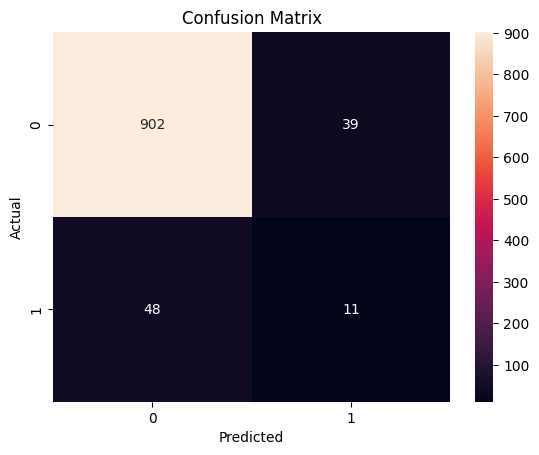

In [6]:
# 6. Visualize
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [7]:
# 7. Deployment Function (Simulate for new incoming data)
def detect_anomalies(new_data):
    new_data_scaled = scaler.transform(new_data)
    preds = model.predict(new_data_scaled)
    return np.where(preds == -1, "Anomaly", "Normal")

In [8]:
# Test with a sample
sample = X[:5]
print("\nSample Anomaly Detection Results:")
print(detect_anomalies(sample))


Sample Anomaly Detection Results:
['Normal' 'Anomaly' 'Normal' 'Normal' 'Normal']
